# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [43]:
# Output File (CSV)
output_data_file = "../WeatherPy/cities.csv"

In [3]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations - reset size to 1500
lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

77

In [5]:
cities

['portland',
 'taolanaro',
 'lisakovsk',
 'rikitea',
 'ruatoria',
 'punta arenas',
 'torbay',
 'falealupo',
 'laguna',
 'bima',
 'cape town',
 'yellowknife',
 'rorvik',
 'albany',
 'denpasar',
 'ayios kirikos',
 'busselton',
 'newtownards',
 'upernavik',
 'rapid valley',
 'samusu',
 'atuona',
 'loandjili',
 'castro',
 'longyearbyen',
 'ribeira grande',
 'butaritari',
 'butterworth',
 'andra',
 'severo-kurilsk',
 'vaini',
 'auki',
 'ushuaia',
 'tsihombe',
 'chapais',
 'arraial do cabo',
 'taunggyi',
 'namibe',
 'yar-sale',
 'lebu',
 'huarmey',
 'mount gambier',
 'westport',
 'puerto ayacucho',
 'hobart',
 'mataura',
 'maceio',
 'saldanha',
 'perelyub',
 'vostok',
 'yenagoa',
 'port alfred',
 'kapaa',
 'belushya guba',
 'jurado',
 'bluff',
 'saskylakh',
 'tasiilaq',
 'bendigo',
 'jamestown',
 'bethel',
 'georgetown',
 'urumqi',
 'cherskiy',
 'mar del plata',
 'klaksvik',
 'bredasdorp',
 'puerto ayora',
 'maple creek',
 'tuktoyaktuk',
 'malwan',
 'pevek',
 'paamiut',
 'eureka',
 'caravela

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [44]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

city = "chicago"


# Build partial query URL
# query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#print(query_url)

# comment out URL query before pushing to github


In [45]:
#cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
temp = []
cloud = []
wind_speed = []
humidity = []
country = []
city_name = []
lon = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    complete_url = f'{query_url}{city}'
    response = requests.get(complete_url).json()
    #print(response)
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        city_name.append(city)
    except:
        #print("City not found")
        pass
        
        
        
# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")

In [46]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": city_name,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "cloud": cloud,
    "wind speed": wind_speed,
    "humidity": humidity,
    "country": country
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,lon,temp,cloud,wind speed,humidity,country
0,portland,45.5234,-122.6762,33.73,1,0.45,40,US
1,lisakovsk,52.5369,62.4936,20.49,98,1.95,49,KZ
2,rikitea,-23.1203,-134.9692,23.08,40,1.77,74,PF
3,punta arenas,-53.1500,-70.9167,5.06,0,1.54,81,CL
4,torbay,47.6666,-52.7314,8.19,20,3.60,89,CA
...,...,...,...,...,...,...,...,...
63,pevek,69.7008,170.3133,0.61,9,6.51,83,RU
64,paamiut,61.9940,-49.6678,4.84,100,6.49,87,GL
65,eureka,40.8021,-124.1637,20.99,4,2.68,72,US
66,caravelas,-17.7125,-39.2481,21.59,0,2.16,87,BR


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [47]:
weather_data.to_csv(output_data_file, index = False)

In [10]:
(weather_data["humidity"]>100)

0     False
1     False
2     False
3     False
4     False
      ...  
63    False
64    False
65    False
66    False
67    False
Name: humidity, Length: 68, dtype: bool

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = weather_data[(weather_data["humidity"]>100)].index
high_humidity

Int64Index([], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(high_humidity)
clean_city_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        68 non-null     object 
 1   lat         68 non-null     float64
 2   lon         68 non-null     float64
 3   temp        68 non-null     float64
 4   cloud       68 non-null     int64  
 5   wind speed  68 non-null     float64
 6   humidity    68 non-null     int64  
 7   country     68 non-null     object 
dtypes: float64(4), int64(2), object(2)
memory usage: 4.8+ KB


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

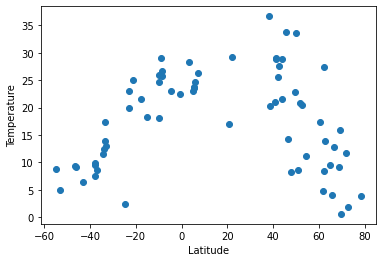

In [13]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [14]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
#regress_values = x_values * slope + intercept
#print(regress_values)

In [15]:
# Create line equation string
#line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

In [16]:
# Create Plot
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")

# # Label plot and annotate the line equation
#plt.xlabel('Latitude')
#plt.ylabel('Temperature')
#plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# # Print r value
print(f"The r-value is: {rvalue**2}")

# # Show plot
#plt.show()

The r-value is: 0.0021777959041574734


## Latitude vs. Humidity Plot

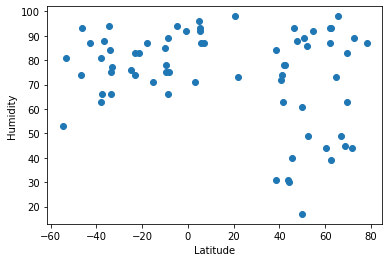

In [17]:
x_values = weather_data['lat']
y_values = weather_data['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

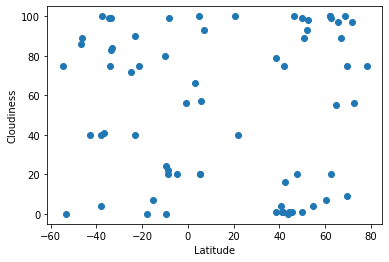

In [18]:
x_values = weather_data['lat']
y_values = weather_data['cloud']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

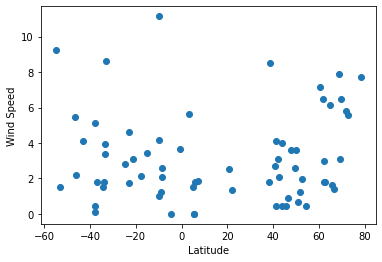

In [19]:
x_values = weather_data['lat']
y_values = weather_data['wind speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
weather_data["lat"] >0

0      True
1      True
2     False
3     False
4      True
      ...  
63     True
64     True
65     True
66    False
67     True
Name: lat, Length: 68, dtype: bool

In [21]:
#find max temp of lats > 0
north_weather_data = weather_data.loc[(weather_data["lat"] >0)]
north_weather_data


,city,lat,lon,temp,cloud,wind speed,humidity,country
0,portland,45.5234,-122.6762,33.73,1,0.45,40,US
1,lisakovsk,52.5369,62.4936,20.49,98,1.95,49,KZ
4,torbay,47.6666,-52.7314,8.28,20,3.60,88,CA
5,laguna,38.4210,-121.4238,36.67,1,1.79,31,US
8,yellowknife,62.4560,-114.3525,27.49,20,1.79,39,CA
9,rorvik,64.8621,11.2373,9.45,55,6.12,73,NO
10,albany,42.6001,-73.9662,27.59,16,2.08,78,US
13,newtownards,54.5924,-5.6909,11.23,4,0.45,92,GB
14,upernavik,72.7868,-56.1549,1.81,56,5.58,89,GL
15,rapid valley,44.0625,-103.1463,28.80,1,0.45,30,US


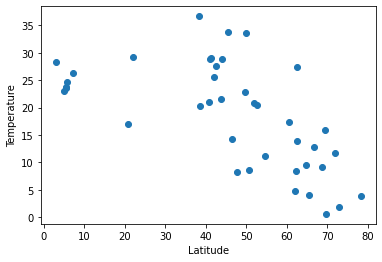

In [22]:
# Create a Scatter Plot for temperature vs latitude
x_values = north_weather_data['lat']
y_values = north_weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [23]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0     18.861781
1     16.979274
4     18.286521
5     20.768150
8     14.316870
9     13.671044
10    19.646430
13    16.427554
14    11.543960
15    19.253904
19    10.086000
20    20.742463
21    30.256592
22    29.631622
23    14.301114
24    17.477984
28    17.718347
30    25.502319
32    13.141950
36    20.037936
37    29.560547
42    17.159164
43    18.603515
44    29.758957
46    25.155558
47    29.173658
49    11.777505
50    13.469090
52    19.781468
53    19.976281
54    29.628374
55    19.324094
56    12.627485
58    14.378443
61    17.682540
62    12.438496
63    12.372279
64    14.440876
65    20.129035
67    14.850821
Name: lat, dtype: float64


In [24]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.27x +31.08


The r-value is: 0.3606108368694876


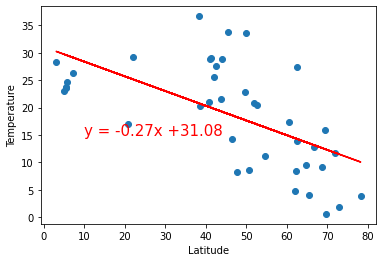

In [25]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# # Label plot and annotate the line equation
# Add title to graph
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

# # Print r value
print(f"The r-value is: {rvalue**2}")

# # Show plot
plt.show()

Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [26]:
southern_weather_data = weather_data.loc[(weather_data["lat"] <0)]
southern_weather_data

,city,lat,lon,temp,cloud,wind speed,humidity,country
2,rikitea,-23.1203,-134.9692,23.08,40,1.77,74,PF
3,punta arenas,-53.1500,-70.9167,5.06,0,1.54,81,CL
6,bima,-8.4667,118.7167,26.72,99,2.08,75,ID
7,cape town,-33.9258,18.4232,12.49,75,1.79,84,ZA
11,denpasar,-8.6500,115.2167,25.81,20,2.57,89,ID
12,busselton,-33.6500,115.3333,13.85,99,3.37,66,AU
16,atuona,-9.8000,-139.0333,25.97,24,11.15,75,PF
17,loandjili,-4.7561,11.8578,23.06,20,0.00,94,CG
18,castro,-24.7911,-50.0119,2.38,72,2.84,76,BR
25,vaini,-21.2000,-175.2000,25.09,75,3.09,83,TO


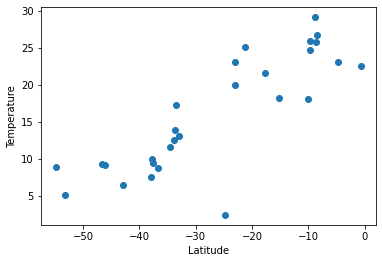

In [27]:
# Create a Scatter Plot for temperature vs latitude
x_values = southern_weather_data['lat']
y_values = southern_weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

2     17.548824
3      4.965362
6     23.689179
7     13.020953
11    23.612370
12    13.136523
16    23.130481
17    25.244046
18    16.848702
25    18.353495
26    23.563092
27     4.273956
29    17.613439
31    20.869333
33    11.474341
34    23.018138
35    11.383579
38     9.269092
39     7.880707
40    23.186716
41    13.403992
45    13.161414
48     7.710034
51    11.830520
57    11.312762
59    12.766851
60    26.927222
66    19.814876
Name: lat, dtype: float64
y = 0.42x +27.24
The r-value is: 0.7012967738293463


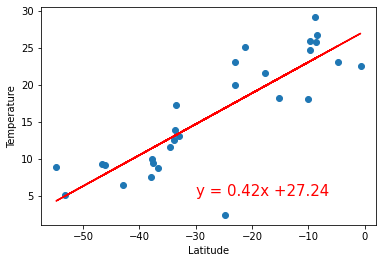

In [28]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# # Label plot and annotate the line equation
# Add title to graph
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")

# # Print r value
print(f"The r-value is: {rvalue**2}")

# # Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

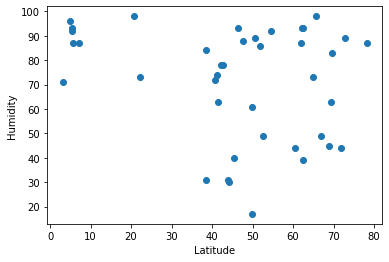

In [29]:
x_values = north_weather_data['lat']
y_values = north_weather_data['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

0     71.080758
1     69.358675
4     70.554520
5     72.824669
8     66.923156
9     66.332367
10    71.798540
13    68.853971
14    64.386549
15    71.439465
19    63.052834
20    72.801171
21    81.504522
22    80.932811
23    66.908743
24    69.814885
28    70.034765
30    77.155400
32    65.848361
36    72.156682
37    80.867792
42    69.523235
43    70.844501
44    81.049294
46    76.838189
47    80.513873
49    64.600192
50    66.147624
52    71.922071
53    72.100282
54    80.929840
55    71.503673
56    65.377738
58    66.979483
61    70.002010
62    65.204855
63    65.144280
64    67.036595
65    72.240018
67    67.411606
Name: lat, dtype: float64
y = -0.25x +82.26
The r-value is: 0.05290908014283964


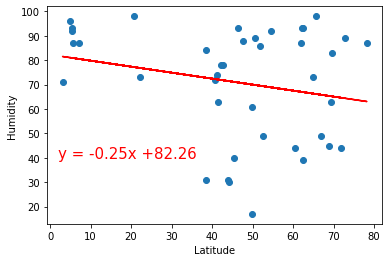

In [30]:
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# # Label plot and annotate the line equation
# Add title to graph
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(2,40),fontsize=15,color="red")

# # Print r value
print(f"The r-value is: {rvalue**2}")

# # Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

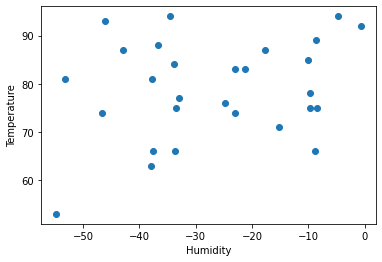

In [31]:
# Create a Scatter Plot for humidity vs latitude
x_values = southern_weather_data['lat']
y_values = southern_weather_data['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

2     79.544718
3     74.419457
6     82.045693
7     77.700510
11    82.014408
12    77.747581
16    81.818134
17    82.678992
18    79.259557
25    79.872461
26    81.994337
27    74.137846
29    79.571035
31    80.897165
33    77.070573
34    81.772377
35    77.033605
38    76.172371
39    75.606880
40    81.841038
41    77.856522
45    77.757719
48    75.537365
51    77.215645
57    77.004761
59    77.597014
60    83.364552
66    80.467683
Name: lat, dtype: float64
y = 0.17x +83.49
The r-value is: 0.06677298292950568


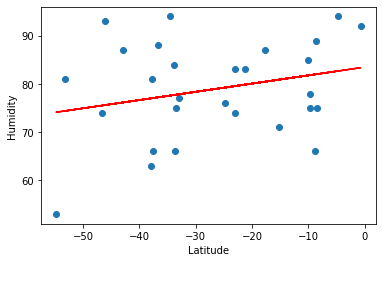

In [32]:
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# # Label plot and annotate the line equation
# Add title to graph
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")

# # Print r value
print(f"The r-value is: {rvalue**2}")

# # Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

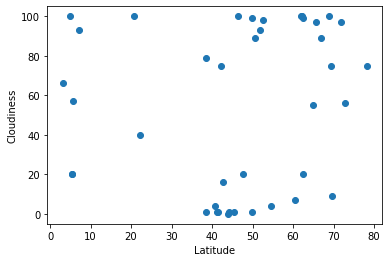

In [33]:
x_values = north_weather_data['lat']
y_values = north_weather_data['cloud']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

0     53.873017
1     55.514598
4     54.374655
5     52.210628
8     57.836265
9     58.399437
10    53.188789
13    55.995709
14    60.254294
15    53.531078
19    61.525662
20    52.233027
21    43.936529
22    44.481515
23    57.850004
24    55.079714
28    54.870114
30    48.082344
32    58.860817
36    52.847389
37    44.543494
42    55.357731
43    54.098230
44    44.370477
46    48.384726
47    44.880868
49    60.050638
50    58.575544
52    53.071033
53    52.901152
54    44.484347
55    53.469872
56    59.309440
58    57.782572
61    54.901337
62    59.474242
63    59.531984
64    57.728129
65    52.767949
67    57.370649
Name: lat, dtype: float64
y = 0.23x +43.22
The r-value is: 0.01520025201484712


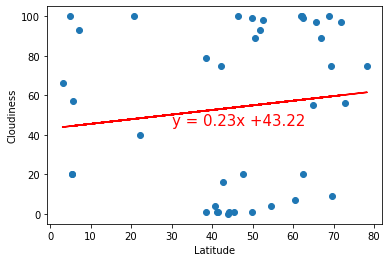

In [34]:
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# # Label plot and annotate the line equation
# Add title to graph
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(30,45),fontsize=15,color="red")

# # Print r value
print(f"The r-value is: {rvalue**2}")

# # Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

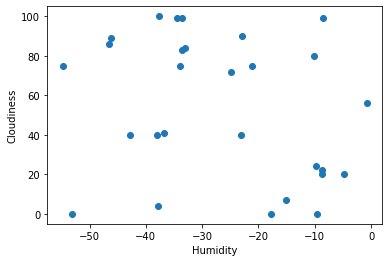

In [35]:
# Create a Scatter Plot for cloudiness vs latitude
x_values = southern_weather_data['lat']
y_values = southern_weather_data['cloud']
plt.scatter(x_values,y_values)
plt.xlabel('Humidity')
plt.ylabel('Cloudiness')
plt.show()

2     52.087377
3     70.373704
6     43.164194
7     58.667293
11    43.275813
12    58.499347
16    43.976095
17    40.904656
18    53.104796
25    50.918027
26    43.347424
27    71.378457
29    51.993478
31    47.262004
33    60.914835
34    44.139353
35    61.046732
38    64.119511
39    66.137116
40    43.894376
41    58.110660
45    58.463176
48    66.385138
51    60.397235
57    61.149643
59    59.036555
60    38.458660
66    48.794344
Name: lat, dtype: float64
y = -0.61x +38.01
The r-value is: 0.07047513756593471


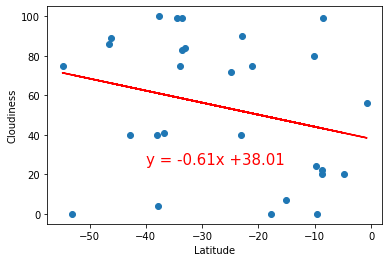

In [36]:
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# # Label plot and annotate the line equation
# Add title to graph
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-40,25),fontsize=15,color="red")

# # Print r value
print(f"The r-value is: {rvalue**2}")

# # Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

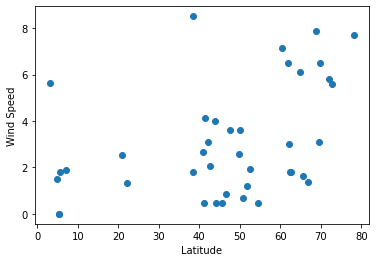

In [37]:
x_values = north_weather_data['lat']
y_values = north_weather_data['wind speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

0     3.065578
1     3.389105
4     3.164442
5     2.737950
8     3.846665
9     3.957657
10    2.930729
13    3.483924
14    4.323217
15    2.998188
19    4.573781
20    2.742365
21    1.107269
22    1.214677
23    3.849373
24    3.303397
28    3.262088
30    1.924337
32    4.048586
36    2.863444
37    1.226892
42    3.358189
43    3.109964
44    1.192793
46    1.983932
47    1.293382
49    4.283080
50    3.992364
52    2.907521
53    2.874040
54    1.215235
55    2.986125
56    4.137002
58    3.836083
61    3.268242
62    4.169482
63    4.180862
64    3.825353
65    2.847788
67    3.754900
Name: lat, dtype: float64
y = 0.05x +0.97
The r-value is: 0.16882222579015357


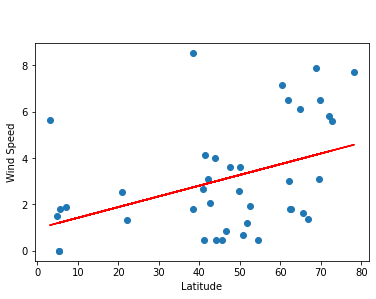

In [38]:
# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# # Label plot and annotate the line equation
# Add title to graph
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# # Print r value
print(f"The r-value is: {rvalue**2}")

# # Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

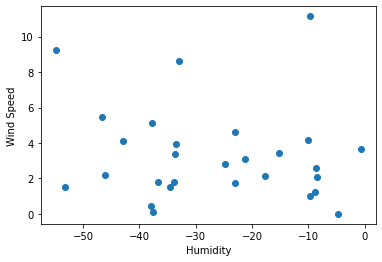

In [39]:
# Create a Scatter Plot for cloudiness vs latitude
x_values = southern_weather_data['lat']
y_values = southern_weather_data['wind speed']
plt.scatter(x_values,y_values)
plt.xlabel('Humidity')
plt.ylabel('Wind Speed')
plt.show()

2     3.245311
3     3.914123
6     2.918951
7     3.485968
11    2.923034
12    3.479825
16    2.948646
17    2.836310
18    3.282523
25    3.202543
26    2.925653
27    3.950871
29    3.241877
31    3.068826
33    3.568171
34    2.954617
35    3.572995
38    3.685380
39    3.759172
40    2.945657
41    3.465609
45    3.478503
48    3.768244
51    3.549240
57    3.576758
59    3.499474
60    2.746849
66    3.124871
Name: lat, dtype: float64
y = -0.02x +2.73
The r-value is: 0.016656741838901524


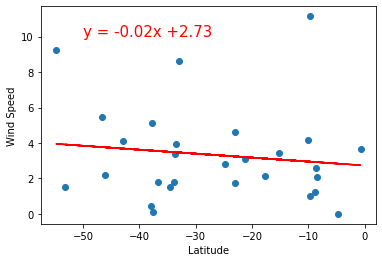

In [40]:
# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# # Label plot and annotate the line equation
# Add title to graph
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

# # Print r value
print(f"The r-value is: {rvalue**2}")

# # Show plot
plt.show()